In [1]:
# Import files
import pandas as pd
from datetime import datetime, timedelta
import multiprocessing as mp
from functools import partial
import csv
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import time
import multiprocessing as mp
from functools import partial
import copy
from decimal import Decimal
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from datetime import timedelta, datetime
import timeit
from functools import partial, reduce
from sklearn import preprocessing # normalize the data
import math
from math import ceil

In [199]:
# How to handle a large datast


file = 'C:/Users/Tenyu/Desktop/JOB/'

# (1) select only necessary columns
df_A = pd.read_csv(file + 'sampledata.csv', usecols=['event', 'ip'])

# (2) Use skiprows to choose starting point and nrows to choose number of rows
df_B = pd.read_csv(file + 'sampledata.csv', skiprows=10, nrows=75)

# (3) Loading the data as chunks
df_temp = pd.read_csv(file + 'sampledata.csv', chunksize=10000)
df_C = pd.concat(df_temp, ignore_index=True)


,event,date,ip,entity
0,bot3,2015-09-01,235.56.188.57,235.56.188
1,bot3,2015-09-01,206.125.206.160,206.125.206
2,bot3,2015-09-01,75.196.171.216,75.196.171
3,bot2,2015-09-01,70.100.111.202,70.100.111
4,bot1,2015-09-01,75.182.185.3,75.182.185
...,...,...,...,...
56521,unsolicited,2015-11-02,85.82.222.45,85.82.222
56522,unsolicited,2015-11-02,164.222.130.100,164.222.130
56523,unsolicited,2015-11-02,174.231.122.31,174.231.122
56524,unsolicited,2015-11-02,174.231.122.213,174.231.122


In [193]:
# Count by each event typoe
file = 'C:/Users/Tenyu/Desktop/JOB/BitSight/'
df = pd.read_csv(file + 'sampledata.csv')

# select the date
df_1 = df[df['date'] == '2015-09-30']

# count based on different events
df_1.groupby('event').size().reset_index(name='counts')

,event,counts
0,bot1,242
1,bot2,303
2,bot3,240
3,unsolicited,179


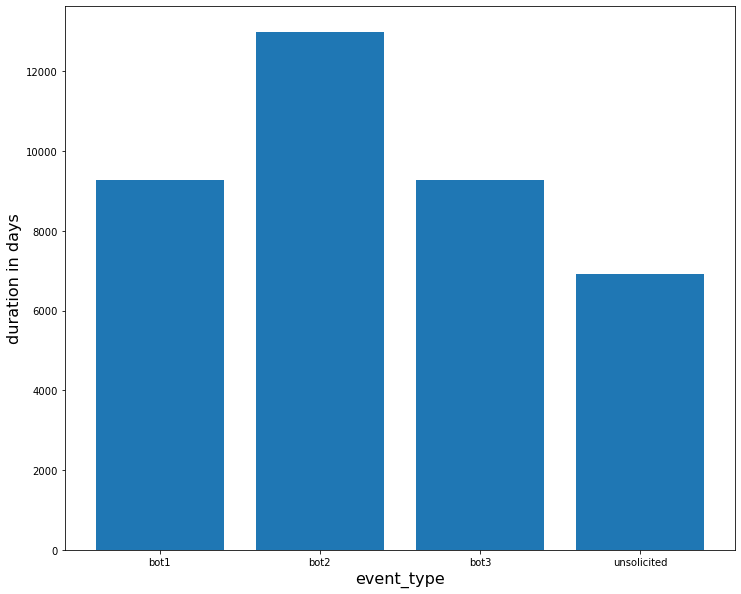

In [97]:
# Count duration days by each event type
# df[df['ip'] == '85.82.222.45']
df['date'] = pd.to_datetime(df['date'])
df_min = df.groupby(["ip", "event"])['date'].min().reset_index()
df_max = df.groupby(["ip", "event"])['date'].max().reset_index()
dff = df_min.merge(df_max, on=['ip', 'event'])
dff['duration'] = (dff['date_y'] - dff['date_x']).dt.days

# plot chart
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 10
df_plot = dff.groupby('event')['duration'].sum().reset_index()
plt.bar(df_plot['event'], df_plot['duration'])
plt.xlabel('event_type', size =16)
plt.ylabel('duration in days', size = 16)
plt.show()

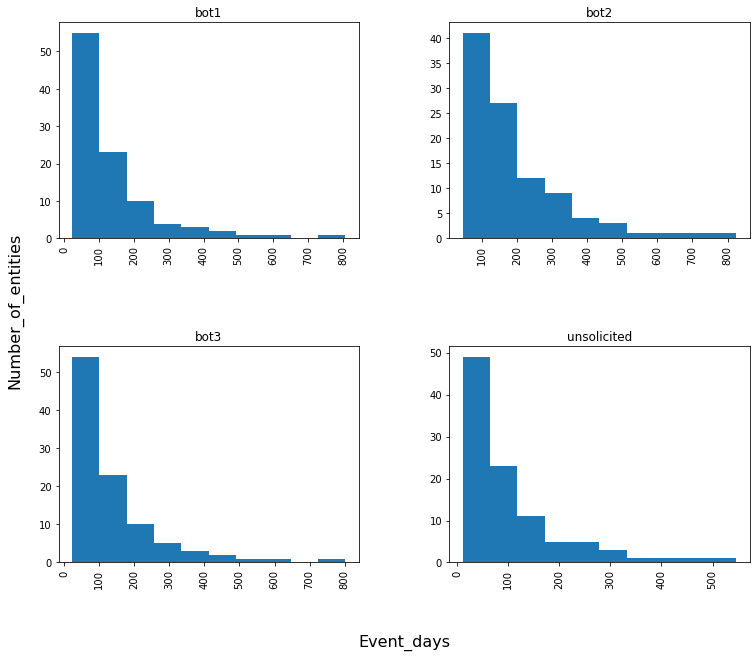

In [125]:
# Distribution by each event
df_2 = df.groupby(['entity', 'date', 'event']).size().reset_index()
df_2 = df_2.groupby(['entity', 'event'])[0].sum().reset_index()
# df_plot1 = df_2.groupby(['event'])[0].sum().reset_index()
axes = df_2[0].hist(by=df_2['event'])

fig=axes[0,0].figure
fig.text(0.5,0.04, "Event_days", ha="center", va="center", size= 16)
fig.text(0.05,0.5, "Number_of_entities", ha="center", va="center", rotation=90, size= 16)

plt.show()

,sumsquare_error,aic,bic,kl_div
gamma,0.000180,1548.802270,-1309.124034,inf
exponpow,0.000198,1535.932774,-1299.211492,inf
chi,0.000208,1546.893105,-1294.687139,inf
norm,0.000291,1708.932072,-1265.564962,inf
lognorm,0.000540,1767.758963,-1199.019313,inf


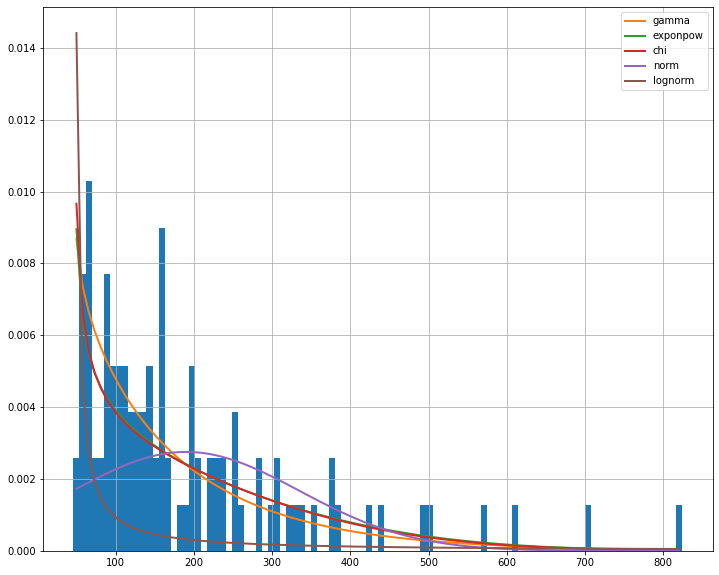

In [204]:
# Apply various distributions and find the best fitting distribution 
# By using the sum square error, the best distribution can be identified
import numpy as np
import scipy.stats as st

df_3 = df_2[df_2['event'] == 'bot2']
data = np.array(df_3[0])

from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "chi",
                          "exponpow",
                          "norm"])
f.fit()
f.summary()